# Introduction

# Setup

## Library Imports

In [1]:
# General
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
from matplotlib import figure

from IPython.display import Image

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Models
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix

from sklearn.model_selection import cross_val_score, KFold


import scipy.stats
from scipy.stats import chi2


print("Setup Complete")

Setup Complete


## Mutual Information

In [2]:
# Utility Functions

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

## Load data

In [3]:
df_filepath ='/kaggle/input/30-days-of-ml/train.csv'
df = pd.read_csv(df_filepath)


pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 75

df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,N,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,O,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,F,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,K,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,N,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [4]:
# Categorical features
cat_features = [ 'cat0',
                 'cat1',
                 'cat2',
                 'cat3',
                 'cat4',
                 'cat5',
                 'cat6',
                 'cat7',
                 'cat8',
                 'cat9']

In [5]:
# Cont features
cont_features = ['cont0',
                 'cont1',
                 'cont2',
                 'cont3',
                 'cont4',
                 'cont5',
                 'cont6',
                 'cont7',
                 'cont8',
                 'cont9',
                 'cont10',
                 'cont11',
                 'cont12',
                 'cont13',
                 'target']

# Exploratory Data Analysis

In [6]:
#List column names
list(df.columns)

['id',
 'cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cont0',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'target']

In [7]:
#Check columns data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

Variables Categoricas. Operaciones.

## Check for duplicates

In [8]:
#Check duplicate rows
df[df.duplicated(keep=False)]


,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target


No duplicate rows

In [9]:
#Check duplicate IDs
df.duplicated(subset=['id']).unique()


array([False])

No duplicate IDs

In [10]:
df = df.drop(['id'], axis=1)

We have unknown values in
- Education_Level
- Marital_Status
- Income_Category

We can later map them or filter them before building the models

## Check zeros

## Target variable distribution

Text(0, 0.5, 'Frequency')

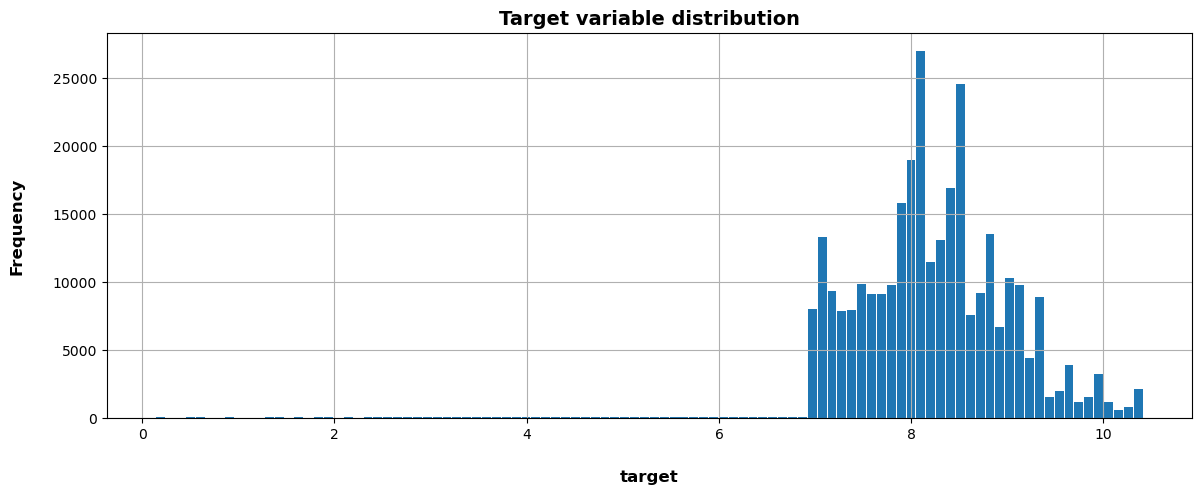

In [11]:
plt = df.target.plot.hist( grid=True,
                           bins=100,
                           rwidth=0.9,
                           figsize=(14,5))

plt.set_title("Target variable distribution", weight='bold', size=14)
plt.set_xlabel("target", labelpad=20, weight='bold', size=12)
plt.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Frequency')

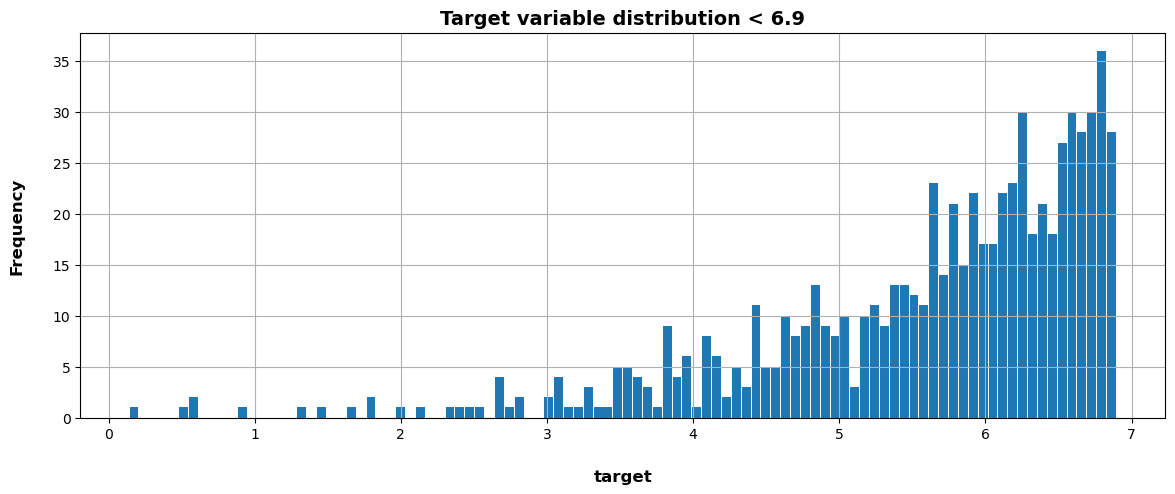

In [12]:
df_target_lower_than_7 = df.loc[df['target'] < 6.9]

plt1 = df_target_lower_than_7.target.plot.hist( grid=True,
                           bins=100,
                           rwidth=0.9,
                           figsize=(14,5))

plt1.set_title("Target variable distribution < 6.9", weight='bold', size=14)
plt1.set_xlabel("target", labelpad=20, weight='bold', size=12)
plt1.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Frequency')

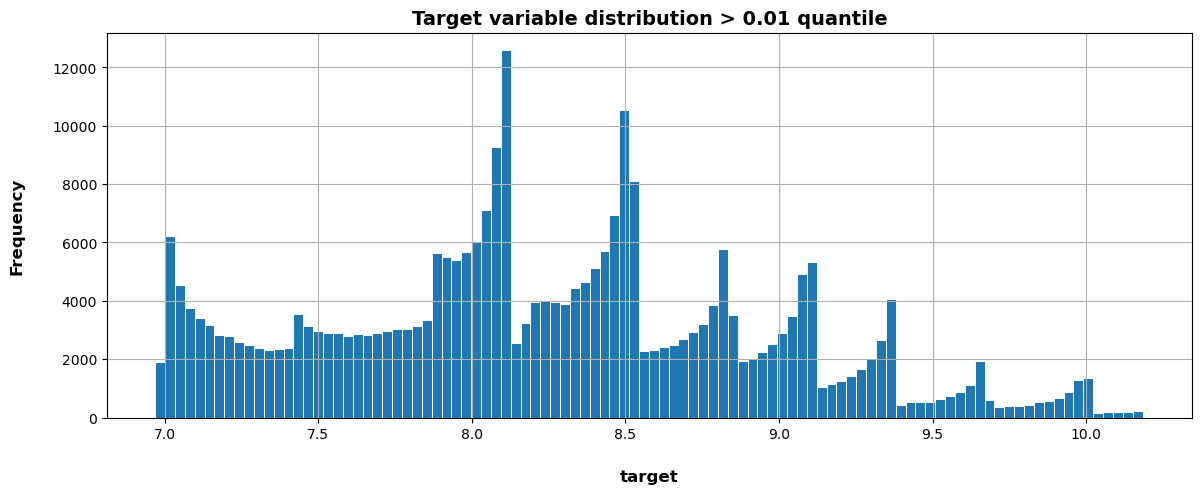

In [13]:
df_target_larger_than_7 = df.loc[(df['target'] > df.target.quantile(0.01)) & (df['target'] < df.target.quantile(0.99))]

plt1 = df_target_larger_than_7.target.plot.hist( grid=True,
                           bins=100,
                           rwidth=0.9,
                           figsize=(14,5))

plt1.set_title("Target variable distribution > 0.01 quantile", weight='bold', size=14)
plt1.set_xlabel("target", labelpad=20, weight='bold', size=12)
plt1.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

## Cleaning border values in the train dataset

In [14]:
df = df.loc[(df['target'] > df.target.quantile(0.01)) & (df['target'] < df.target.quantile(0.99))]

## Mutual Information

In [15]:
X = df.copy()
y = X.pop("target")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int
X

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,0,0,0,0,0,0,0,0,0,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,0,0,1,1,0,1,0,1,1,1,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,1,1,1,0,0,1,0,2,1,2,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,0,0,1,0,0,1,0,0,0,3,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,1,1,1,0,0,1,0,0,1,0,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,0,0,1,1,0,1,0,0,1,5,0.697124,0.483452,0.297770,0.195821,0.307883,0.769792,0.450538,0.934360,1.005077,0.853726,0.422541,1.063463,0.697685,0.506404
299996,1,0,1,0,0,0,0,0,3,2,0.446200,0.715135,0.610931,0.601730,0.736713,0.528056,0.508502,0.358247,0.257825,0.433525,0.301015,0.268447,0.577055,0.823611
299997,0,0,1,0,0,2,0,0,2,2,0.544279,0.060937,0.590955,0.905308,0.277074,0.688747,0.372425,0.364936,0.383224,0.551825,0.661007,0.629606,0.714139,0.245732
299998,1,0,1,0,0,0,0,0,3,5,0.300062,0.613118,0.285213,0.406851,0.805963,0.344404,0.424243,0.382028,0.468819,0.351036,0.288768,0.611169,0.380254,0.332030


In [16]:
mi_scores = make_mi_scores(X, y, discrete_features)

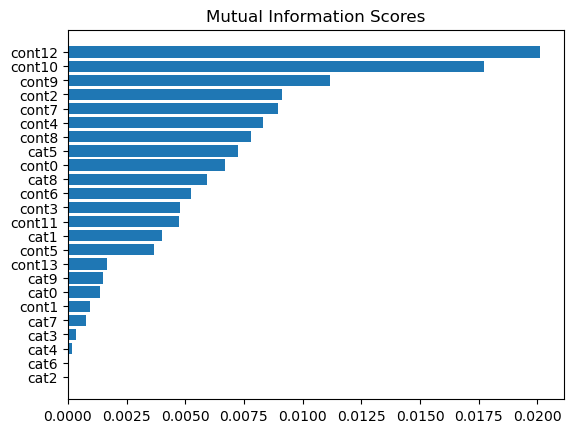

In [17]:
import matplotlib.pyplot as plt

plot_mi_scores(mi_scores)

## Categorical variables

### cat0

[Text(0.5, 1.0, 'cat0 values distribution')]

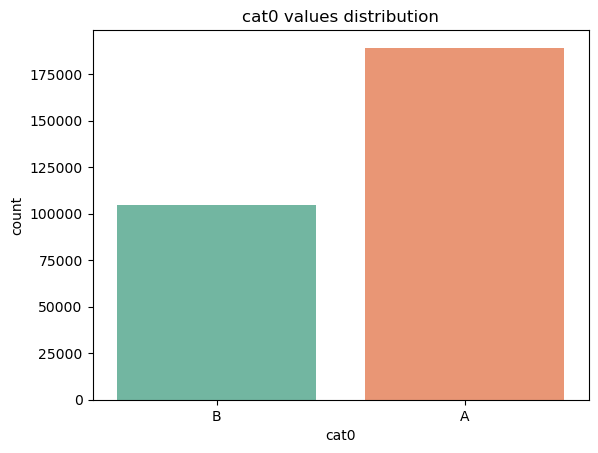

In [18]:
sns.countplot(x = 'cat0', palette = 'Set2', data = df).set(title='cat0 values distribution')

[Text(0.5, 1.0, 'target by cat0 boxplot')]

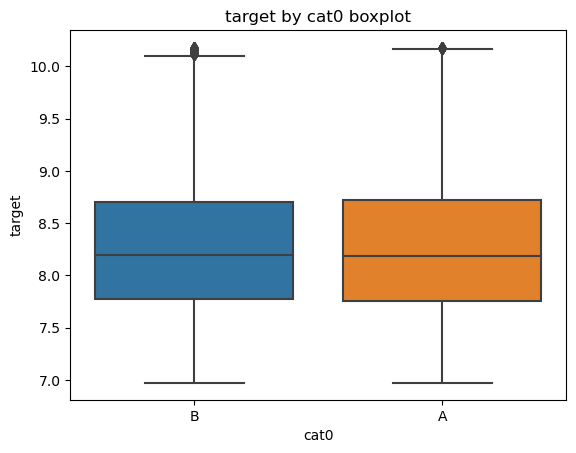

In [19]:
sns.boxplot(x='cat0', y='target', data=df).set(title='target by cat0 boxplot')

### cat1

[Text(0.5, 1.0, 'cat1 values distribution')]

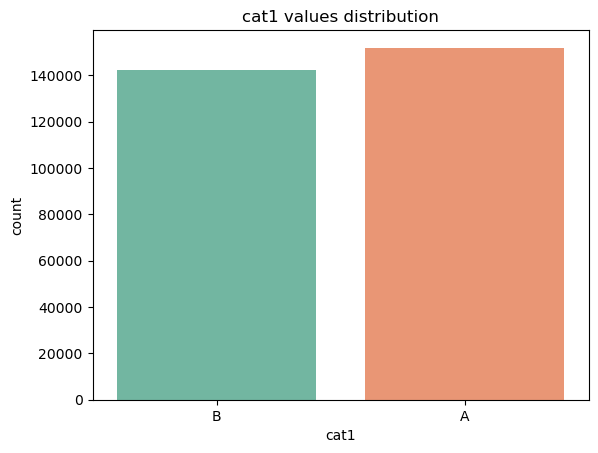

In [20]:
sns.countplot(x = 'cat1', palette = 'Set2', data = df).set(title='cat1 values distribution')

[Text(0.5, 1.0, 'target by cat1 boxplot')]

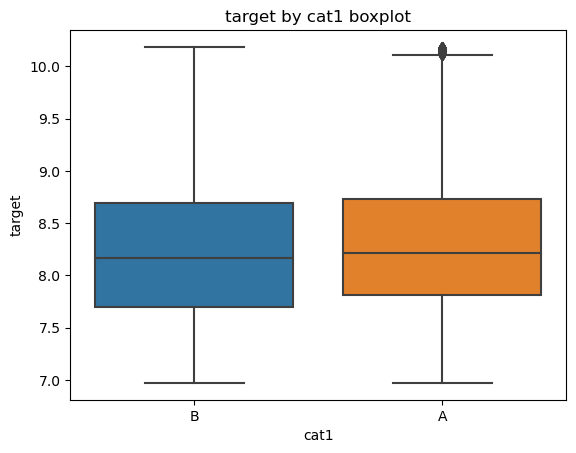

In [21]:
sns.boxplot(x='cat1', y='target', data=df).set(title='target by cat1 boxplot')

### cat2

[Text(0.5, 1.0, 'cat2 values distribution')]

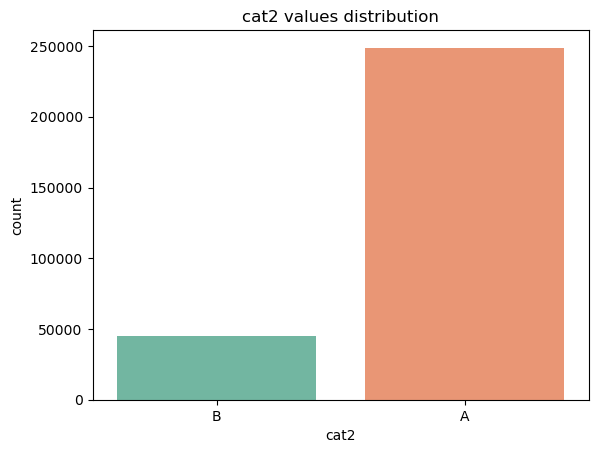

In [22]:
sns.countplot(x = 'cat2', palette = 'Set2', data = df).set(title='cat2 values distribution')

[Text(0.5, 1.0, 'target by cat2 boxplot')]

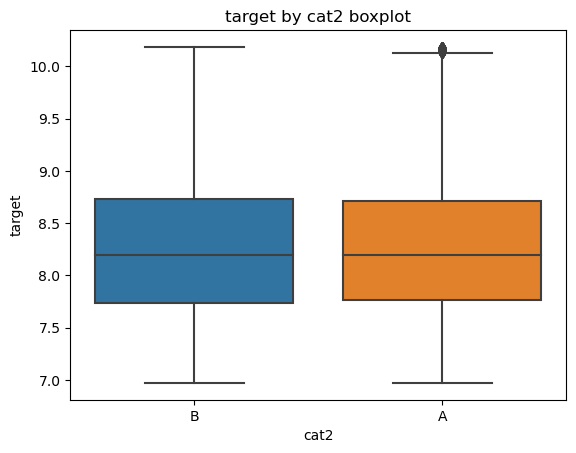

In [23]:
sns.boxplot(x='cat2', y='target', data=df).set(title='target by cat2 boxplot')

### cat3

[Text(0.5, 1.0, 'cat3 values distribution')]

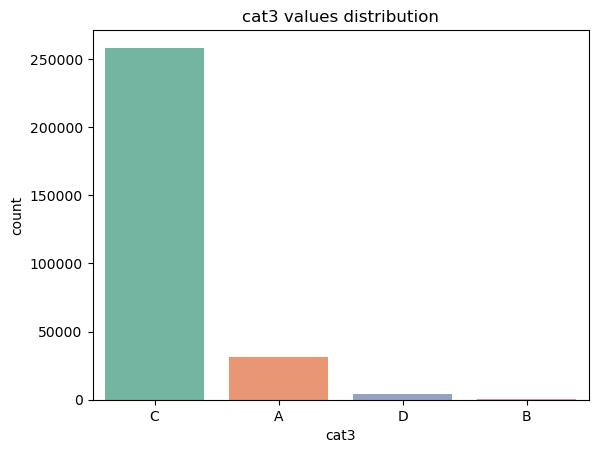

In [24]:
sns.countplot(x = 'cat3', palette = 'Set2', data = df).set(title='cat3 values distribution')

[Text(0.5, 1.0, 'target by cat3 boxplot')]

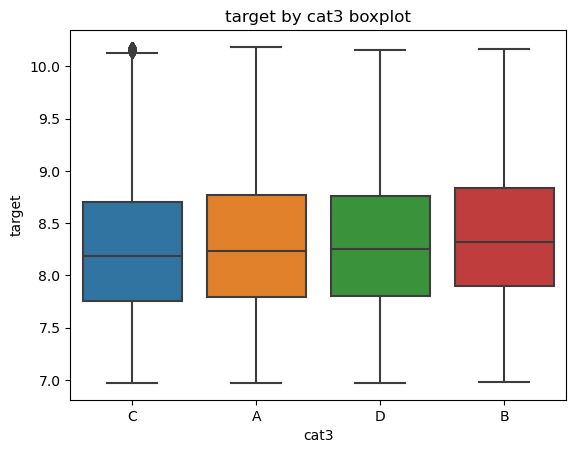

In [25]:
sns.boxplot(x='cat3', y='target', data=df).set(title='target by cat3 boxplot')

The categories are too unbalanced for this column to be used

### cat4

[Text(0.5, 1.0, 'cat4 values distribution')]

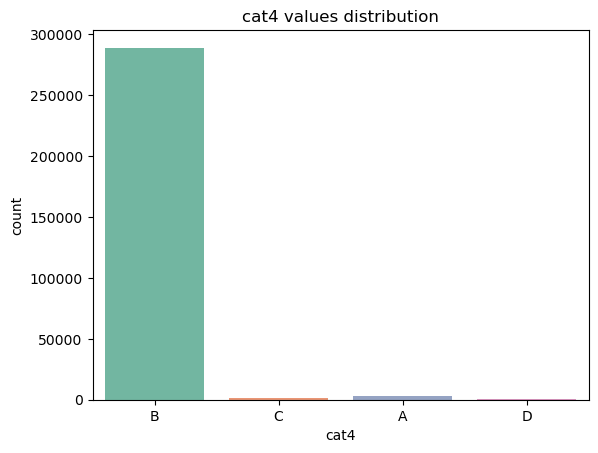

In [26]:
sns.countplot(x = 'cat4', palette = 'Set2', data = df).set(title='cat4 values distribution')

[Text(0.5, 1.0, 'target by cat4 boxplot')]

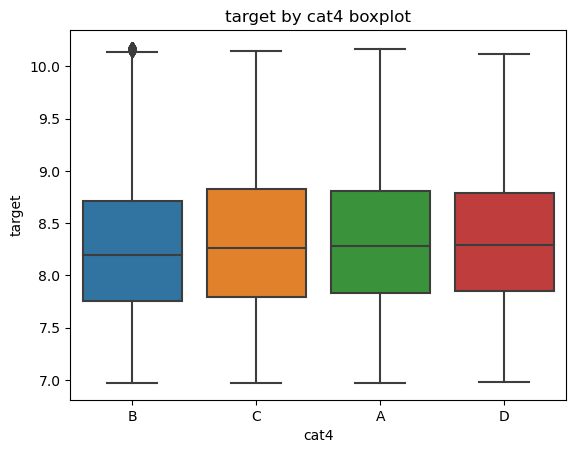

In [27]:
sns.boxplot(x='cat4', y='target', data=df).set(title='target by cat4 boxplot')

The categories are too unbalanced for this column to be used

### cat5

[Text(0.5, 1.0, 'cat5 values distribution')]

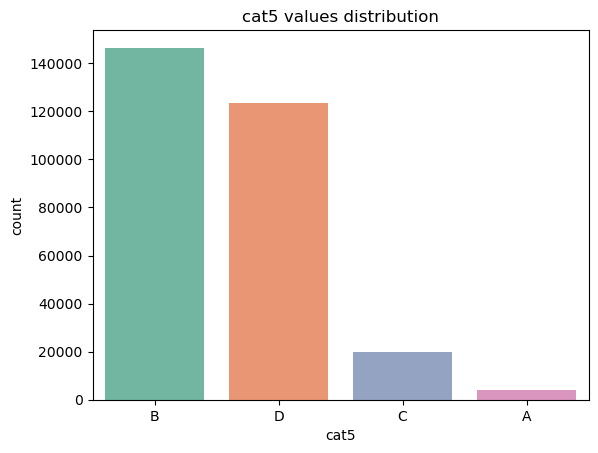

In [28]:
sns.countplot(x = 'cat5', palette = 'Set2', data = df).set(title='cat5 values distribution')

[Text(0.5, 1.0, 'target by cat5 boxplot')]

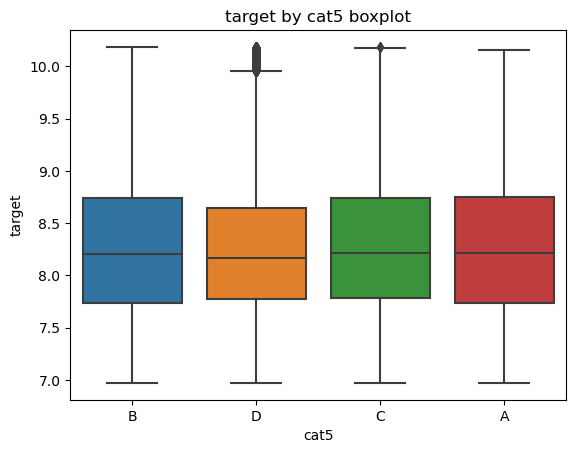

In [29]:
sns.boxplot(x='cat5', y='target', data=df).set(title='target by cat5 boxplot')

### cat6

[Text(0.5, 1.0, 'cat6 values distribution')]

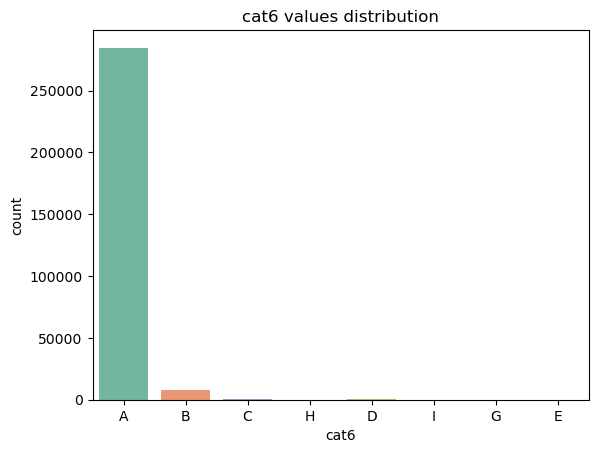

In [30]:
sns.countplot(x = 'cat6', palette = 'Set2', data = df).set(title='cat6 values distribution')

[Text(0.5, 1.0, 'target by cat6 boxplot')]

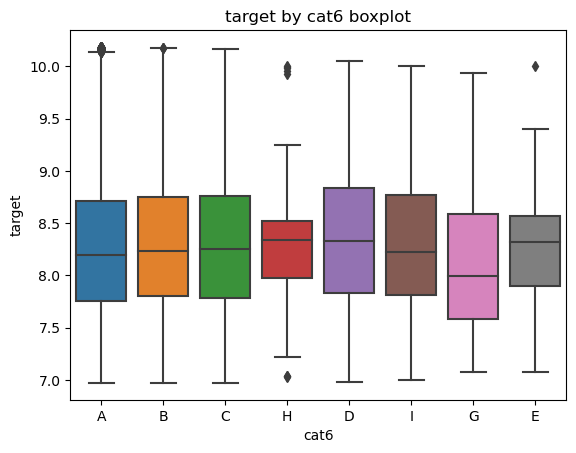

In [31]:
sns.boxplot(x='cat6', y='target', data=df).set(title='target by cat6 boxplot')

The categories are too unbalanced for this column to be used

### cat7

[Text(0.5, 1.0, 'cat7 values distribution')]

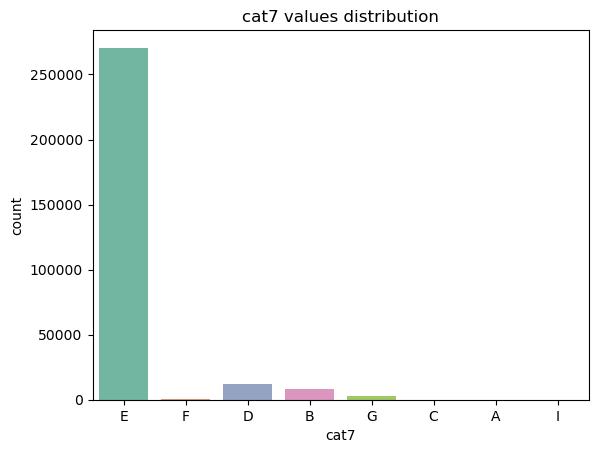

In [32]:
sns.countplot(x = 'cat7', palette = 'Set2', data = df).set(title='cat7 values distribution')

[Text(0.5, 1.0, 'target by cat7 boxplot')]

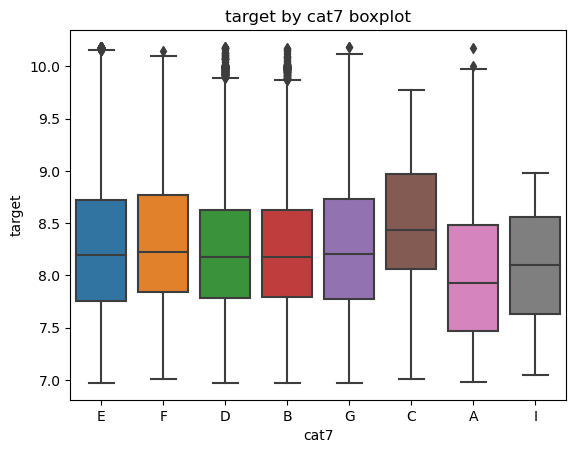

In [33]:
sns.boxplot(x='cat7', y='target', data=df).set(title='target by cat7 boxplot')

### cat8

[Text(0.5, 1.0, 'cat8 values distribution')]

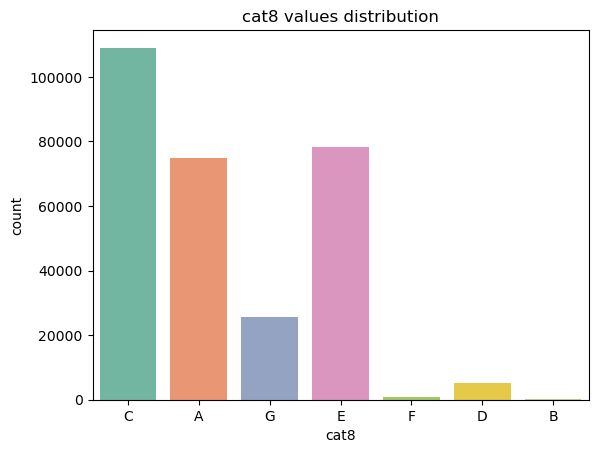

In [34]:
sns.countplot(x = 'cat8', palette = 'Set2', data = df).set(title='cat8 values distribution')

[Text(0.5, 1.0, 'target by cat8 boxplot')]

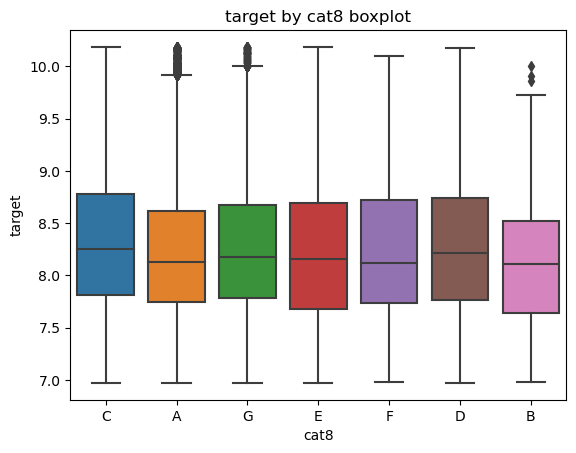

In [35]:
sns.boxplot(x='cat8', y='target', data=df).set(title='target by cat8 boxplot')

### cat9

[Text(0.5, 1.0, 'cat9 values distribution')]

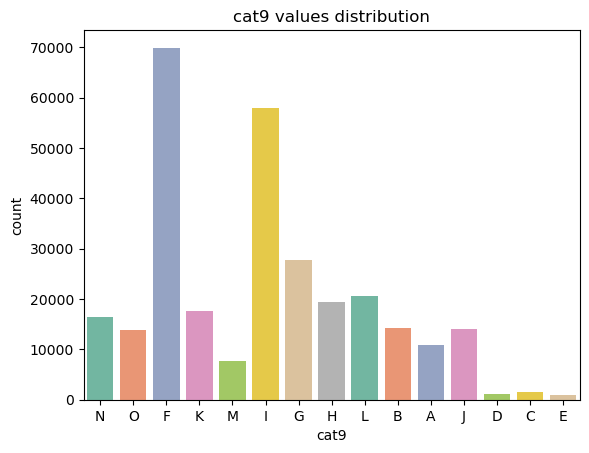

In [36]:
sns.countplot(x = 'cat9', palette = 'Set2', data = df).set(title='cat9 values distribution')

[Text(0.5, 1.0, 'target by cat9 boxplot')]

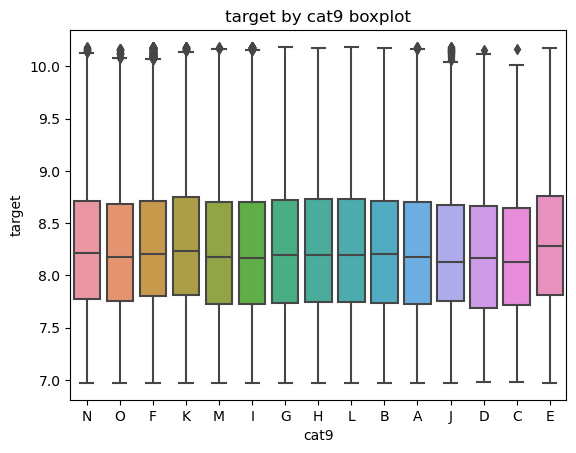

In [37]:
sns.boxplot(x='cat9', y='target', data=df).set(title='target by cat9 boxplot')

## Predictor variable candidates

- cat5
- cat8
- cat1
- cat9
- cat7

## Cont Variables

### Correlation Matrix

<AxesSubplot:>

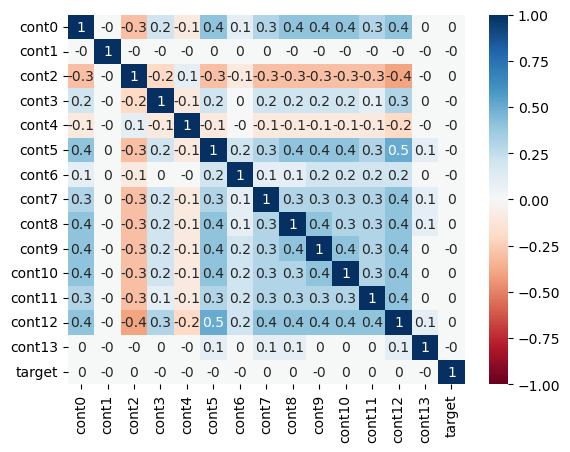

In [38]:
#fig, ax = plt.subplots()
correlation = df.loc[:, df.columns.isin(cont_features)].corr().round(1)
#plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'RdBu', vmin=-1, vmax=1)
#plt.show()


### Numerics

### Categoricals

- cat5
- cat8
- cat1
- cat9
- cat7

# Models preparation and evaluation


## Dataset preparation

### Categoricals

#### Ordinal encoding

In [39]:
#Income_Category_enc = df['Income_Category']
#Income_Category_enc.unique()

In [40]:
#We map unknowns to 0, which is the most repeated value
#df['Income_Category'] =  df['Income_Category'].map({'Unknown':1,
#                                                'Less than $40K':1,
#                                                '$40K - $60K':2,
#                                                '$60K - $80K':3,
#                                                '$80K - $120K':4, 
#                                                '$120K +':5})

#### Onehot encoder

In [41]:
#categoricals = ['Gender']

#enc = OneHotEncoder(drop='first')
#X = df[categoricals]
#enc.fit(X)
#enc.categories_

dummies = enc.transform(X).toarray()
dummies

dummies.shape

dummies_df = pd.DataFrame(dummies)
dummies_df

col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]

col_names

col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

dummies_df.columns = col_names_drop_first
dummies_df

#### Numerics

In [42]:
X = df[cont_features]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in cont_features]
std_df

,cont0_std,cont1_std,cont2_std,cont3_std,cont4_std,cont5_std,cont6_std,cont7_std,cont8_std,cont9_std,cont10_std,cont11_std,cont12_std,cont13_std,target_std
0,-1.413799,-2.223561,0.705692,-1.643693,0.496278,-0.481481,-1.459771,-1.037174,-0.453772,-0.949949,-0.927006,-0.429174,-0.696710,1.622280,-0.176030
1,0.936144,-0.437317,2.094602,-0.596607,-0.894487,0.099972,0.435789,-0.095583,0.402758,-0.611047,1.686443,2.020323,-0.941203,-0.193204,0.348608
2,0.934584,-0.703816,-1.987502,0.366714,-0.860239,0.614824,-0.437079,1.675404,0.237156,1.692116,1.072078,0.661977,0.189696,1.146824,0.181793
3,-0.424176,0.747743,0.343544,-0.985242,-0.861934,0.695302,-1.085108,0.897735,0.755819,0.459612,-0.502084,1.087551,0.184339,-1.020289,-0.267914
4,2.303867,-0.436935,-2.144253,-1.205148,-0.849736,0.774090,-0.221593,0.509100,0.776177,2.211205,2.056770,1.367402,0.531093,-1.154212,-0.377799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293995,0.736796,0.104969,-0.762242,-1.372054,-0.765220,1.136948,-0.079561,1.821169,2.112614,1.738883,-0.202997,2.658844,0.821757,-0.007868,-0.415841
293996,-0.351938,1.187665,0.473748,0.479729,1.021199,0.077936,0.196048,-0.820195,-1.002581,-0.188639,-0.677929,-0.922045,0.333663,1.414885,-1.299975
293997,0.073619,-1.869525,0.394904,1.864673,-0.893566,0.781902,-0.450979,-0.789526,-0.479809,0.354022,0.728941,0.704678,0.888333,-1.177049,0.670473
293998,-0.986014,0.710921,-0.811803,-0.409323,1.309681,-0.726625,-0.204592,-0.711166,-0.122975,-0.567025,-0.725792,0.621635,-0.462628,-0.789978,-1.437769


#### Concat results

In [43]:
df_prep = pd.concat([#dummies_df,
                     std_df
                     ], axis = 1)
df_prep

,cont0_std,cont1_std,cont2_std,cont3_std,cont4_std,cont5_std,cont6_std,cont7_std,cont8_std,cont9_std,cont10_std,cont11_std,cont12_std,cont13_std,target_std
0,-1.413799,-2.223561,0.705692,-1.643693,0.496278,-0.481481,-1.459771,-1.037174,-0.453772,-0.949949,-0.927006,-0.429174,-0.696710,1.622280,-0.176030
1,0.936144,-0.437317,2.094602,-0.596607,-0.894487,0.099972,0.435789,-0.095583,0.402758,-0.611047,1.686443,2.020323,-0.941203,-0.193204,0.348608
2,0.934584,-0.703816,-1.987502,0.366714,-0.860239,0.614824,-0.437079,1.675404,0.237156,1.692116,1.072078,0.661977,0.189696,1.146824,0.181793
3,-0.424176,0.747743,0.343544,-0.985242,-0.861934,0.695302,-1.085108,0.897735,0.755819,0.459612,-0.502084,1.087551,0.184339,-1.020289,-0.267914
4,2.303867,-0.436935,-2.144253,-1.205148,-0.849736,0.774090,-0.221593,0.509100,0.776177,2.211205,2.056770,1.367402,0.531093,-1.154212,-0.377799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293995,0.736796,0.104969,-0.762242,-1.372054,-0.765220,1.136948,-0.079561,1.821169,2.112614,1.738883,-0.202997,2.658844,0.821757,-0.007868,-0.415841
293996,-0.351938,1.187665,0.473748,0.479729,1.021199,0.077936,0.196048,-0.820195,-1.002581,-0.188639,-0.677929,-0.922045,0.333663,1.414885,-1.299975
293997,0.073619,-1.869525,0.394904,1.864673,-0.893566,0.781902,-0.450979,-0.789526,-0.479809,0.354022,0.728941,0.704678,0.888333,-1.177049,0.670473
293998,-0.986014,0.710921,-0.811803,-0.409323,1.309681,-0.726625,-0.204592,-0.711166,-0.122975,-0.567025,-0.725792,0.621635,-0.462628,-0.789978,-1.437769


In [44]:
X = df_prep
y = X.pop("target_std")

## XGBoost

### Training

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [46]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [47]:
y_pred = my_model.predict(X_test)

y_pred

array([ 0.01076365, -0.01690288,  0.02588814, ...,  0.02454657,
        0.39703918, -0.12987976], dtype=float32)

### Evaluation

## Random forest

### Training

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [49]:
my_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=50, random_state=0))
                             ])

In [50]:
y_pred = my_model.predict(X_test)

y_pred

array([-0.06129835,  0.2309468 , -0.03875663, ...,  0.04462503,
        0.42339417, -0.24924049], dtype=float32)

# Conclusions

- We can see that both models perform better than the baseline.
- Given the fact that we are trying to identify clients with a possible attrition, our lead metric should be the Recall Sensitivity of the model (If we are going to personalize a retention campaign, the false positives shouldn't be be a problem as long as I don't miss the true positives).
- The logistic regression model has the same recall sensitivity as the KNN model, but the KNN model has a better precision and overall performance.
- In this case I would choose the KNN model to identify the users with a possible attrition.